In [135]:
import numpy as np

## Math

.. TBD

## Parameters

In [124]:
# Transmission ratio m
m = 3 / 8 / 4500

# acceleration and deacceleration set point
a = 30

# velocity set point
v_set = 10

# position set point
x_set = 15

# clock frequency (atmega)
f_clk = 16e6 / 8

# counter with (8bit)
n_cnt = 256

## Movement Planning

In [127]:
f_last = f_clk / (n_cnt-1)

n = np.round(f_clk / f_last)

movement_plan = [
    [n, 1]
]

# 
t = 0.0

while (m * f_clk / movement_plan[-1][0]) < v_set:
    
    t += 1/f_last

    f_new = f_last +  a / m / f_last

    n = np.round(f_clk / f_new)

    if n == movement_plan[-1][0] and movement_plan[-1][1] < 256:
        movement_plan[-1][1] += 1
    else:
        movement_plan.append([n, 1])

    f_last = f_new

len_acc_part = len(movement_plan)
x_acc = m * sum((movement[1] for movement in movement_plan))

steps_steady_left = (x_set - 2 * x_acc) // m
n_steady = movement_plan[-1][0]

while steps_steady_left > 0:

    if n_steady == movement_plan[-1][0] and movement_plan[-1][1] < 256:
        movement_plan[-1][1] += 1
    else:
        movement_plan.append([n_steady, 1])
    
    steps_steady_left -= 1


movement_plan.extend(
    reversed(movement_plan[:len_acc_part])
)

In [128]:
(x_set - 2 * x_acc)

11.613166666666666

In [129]:
x_acc

1.6934166666666666

## Display Movement

In [130]:
steps = sum([cnt*[n] for n, cnt in movement_plan], [])

In [131]:
t_s = []
v_s = []
x_s = []

x = 0
t = 0

for n in steps:
    T = n / f_clk
    t += T
    x += m

    t_s.append(t)
    v_s.append(m/T)
    x_s.append(x)

In [132]:
from matplotlib import pyplot as plt

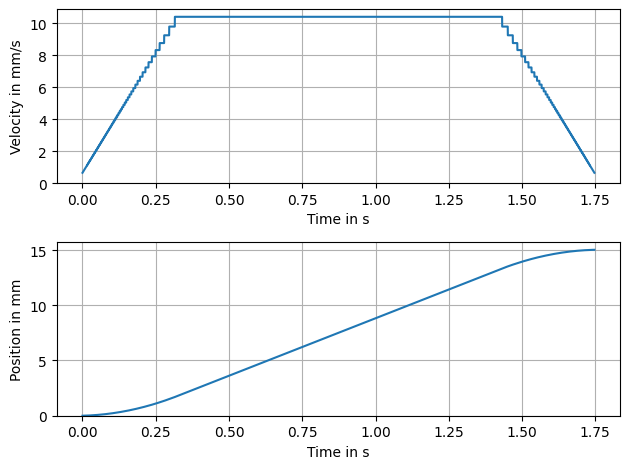

In [133]:
fig, [ax1, ax2] =  plt.subplots(2,1)

ax1.plot(t_s, v_s)

ax1.set_ylim((0,None))

ax1.set_xlabel("Time in s")
ax1.set_ylabel("Velocity in mm/s")
ax1.grid()

ax2.plot(t_s, x_s)

ax2.set_ylim((0,None))

ax2.set_xlabel("Time in s")
ax2.set_ylabel("Position in mm")
ax2.grid()

plt.tight_layout()